# Time-Series Forecasting FBProphet 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
%matplotlib inline

# STEP #1: IMPORTING DATA

In [2]:
df = pd.read_csv(filepath_or_buffer="avocado.csv", usecols=['Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])
df.head()

Date  AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0  2015-12-27          1.33      64236.62     8696.87     8603.62       93.25   
1  2015-12-20          1.35      54876.98     9505.56     9408.07       97.49   
2  2015-12-13          0.93     118220.22     8145.35     8042.21      103.14   
3  2015-12-06          1.08      78992.15     5811.16     5677.40      133.76   
4  2015-11-29          1.28      51039.60     6183.95     5986.26      197.69   

   XLarge Bags          type  year  region  
0          0.0  conventional  2015  Albany  
1          0.0  conventional  2015  Albany  
2          0.0  conventional  2015  Albany  
3          0.0  conventional  2015  Albany  
4          0.0  conventional  2015  Albany

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Total Bags    18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   year          18249 non-null  int64  
 9   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


# STEP #2: EXPLORING THE DATASET  

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.sort_values(by=["Date"])

Date  AveragePrice  Total Volume  Total Bags  Small Bags  \
11569 2015-01-04          1.75      27365.89    13598.46    13061.10   
9593  2015-01-04          1.49      17723.17      905.55      905.55   
10009 2015-01-04          1.68       2896.72     2528.08     2528.08   
1819  2015-01-04          1.52      54956.80    14925.18    11264.80   
9333  2015-01-04          1.64       1505.12      374.35      186.67   
...          ...           ...           ...         ...         ...   
8574  2018-03-25          1.36     908202.13   127409.04   103579.41   
9018  2018-03-25          0.70    9010588.32  4014132.29  3398569.92   
18141 2018-03-25          1.42     163496.70   129163.36   109052.26   
17673 2018-03-25          1.70     190257.38    89631.19    89424.11   
8814  2018-03-25          1.34    1774776.77   801373.63   774634.09   

       Large Bags  XLarge Bags          type  year              region  
11569      537.36         0.00       organic  2015           Southeast  
9593         0.00         0.00       organic  2015             Chicago  
10009        0.00         0.00       organic  2015  HarrisburgScranton  
1819      3660.38         0.00  conventional  2015          Pittsburgh  
9333       187.68         0.00       organic  2015               Boise  
...           ...          ...           ...   ...                 ...  
8574     22467.04      1362.59  conventional  2018             Chicago  
9018    546409.74     69152.63  conventional  2018        SouthCentral  
18141    20111.10         0.00       organic  2018        SouthCentral  
17673      207.08         0.00       organic  2018          California  
8814     23833.93      2905.61  conventional  2018             NewYork  

[18249 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   Total Bags    18249 non-null  float64       
 4   Small Bags    18249 non-null  float64       
 5   Large Bags    18249 non-null  float64       
 6   XLarge Bags   18249 non-null  float64       
 7   type          18249 non-null  object        
 8   year          18249 non-null  int64         
 9   region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.4+ MB


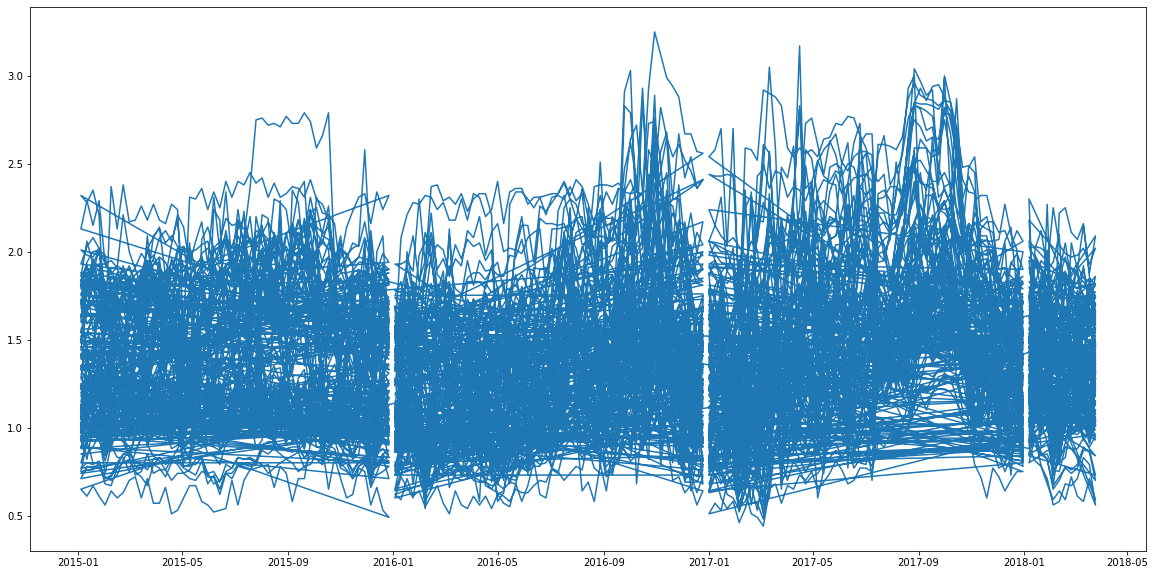

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["AveragePrice"]);

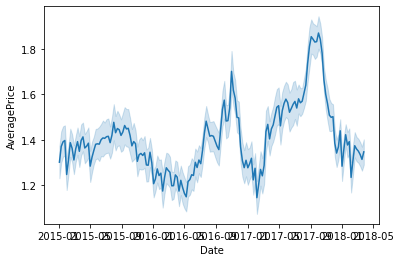

In [8]:
sns.lineplot(data=df, x="Date", y="AveragePrice");

In [9]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

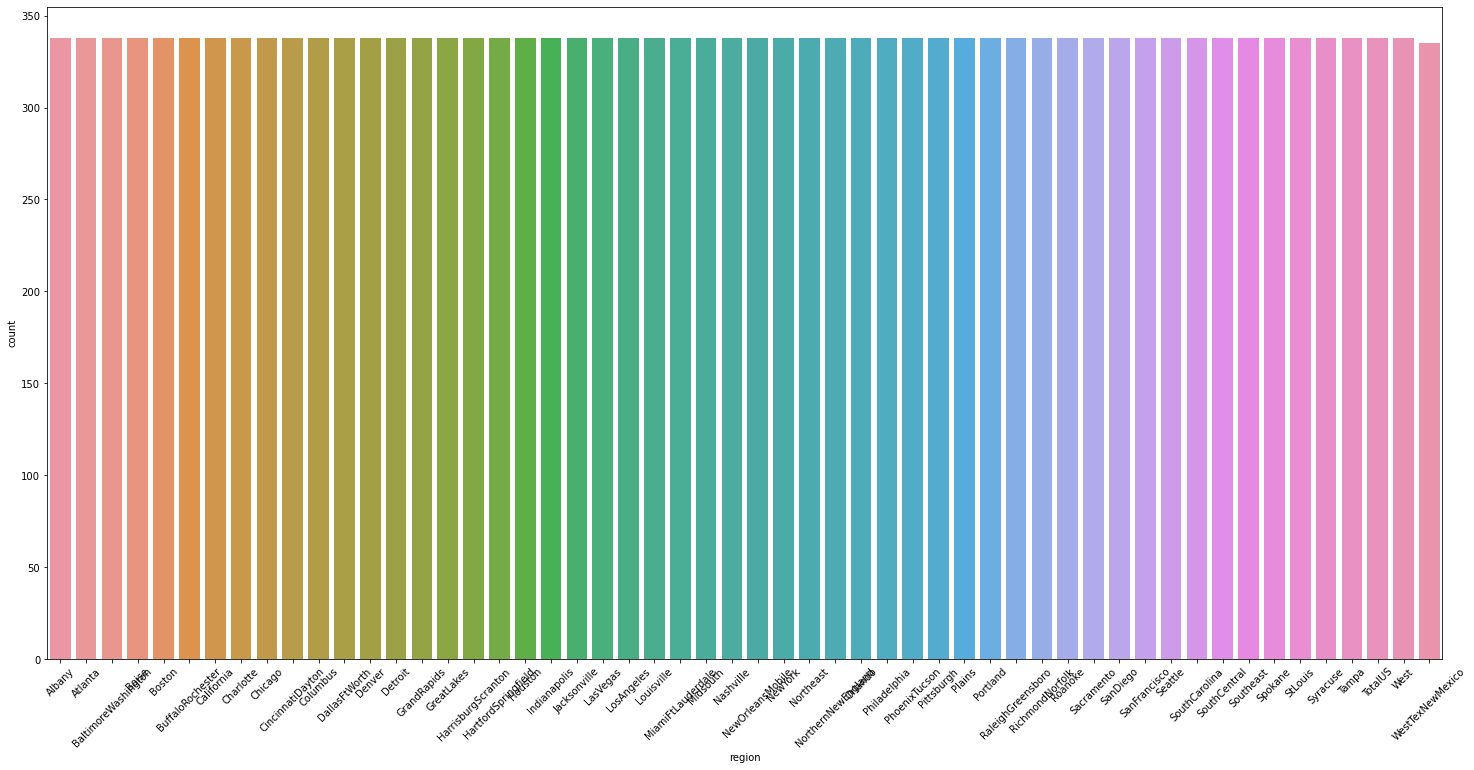

In [10]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45);

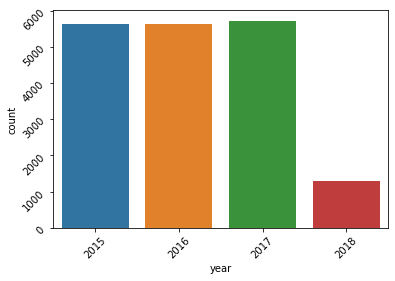

In [11]:
sns.countplot(data=df, x="year")
plt.xticks(rotation = 45);
plt.yticks(rotation = 45);

# STEP 3: MAKE PREDICTIONS

Must have ds and y as columns names

### Part 1:

In [12]:
df = df[["Date", "AveragePrice"]]
df = df.rename(mapper={'Date':'ds', 'AveragePrice':'y'}, axis=1)
df.head()

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35
2 2015-12-13  0.93
3 2015-12-06  1.08
4 2015-11-29  1.28

In [13]:
%%time
from fbprophet import Prophet

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 24.9 s


In [14]:
# Forcasting into the future

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [15]:
future

ds
0   2015-01-04
1   2015-01-11
2   2015-01-18
3   2015-01-25
4   2015-02-01
..         ...
529 2019-03-21
530 2019-03-22
531 2019-03-23
532 2019-03-24
533 2019-03-25

[534 rows x 1 columns]

In [16]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2015-01-04  1.500084    0.927641    1.900433     1.500084     1.500084   
1   2015-01-11  1.494831    0.939516    1.883438     1.494831     1.494831   
2   2015-01-18  1.489578    0.922137    1.845229     1.489578     1.489578   
3   2015-01-25  1.484325    0.846348    1.827227     1.484325     1.484325   
4   2015-02-01  1.479072    0.842186    1.815448     1.479072     1.479072   
..         ...       ...         ...         ...          ...          ...   
529 2019-03-21  1.173476    0.598920    1.599336     0.995397     1.349689   
530 2019-03-22  1.172768    0.542800    1.586747     0.992891     1.349519   
531 2019-03-23  1.172061    0.561252    1.577553     0.991195     1.349394   
532 2019-03-24  1.171354    0.585675    1.598844     0.989653     1.349263   
533 2019-03-25  1.170647    0.561542    1.622838     0.988171     1.349600   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -0.114636             -0.114636             -0.114636 -0.114636   
1         -0.106332             -0.106332             -0.106332 -0.106332   
2         -0.106074             -0.106074             -0.106074 -0.106074   
3         -0.125065             -0.125065             -0.125065 -0.125065   
4         -0.153456             -0.153456             -0.153456 -0.153456   
..              ...                   ...                   ...       ...   
529       -0.087423             -0.087423             -0.087423 -0.087423   
530       -0.085713             -0.085713             -0.085713 -0.085713   
531       -0.083727             -0.083727             -0.083727 -0.083727   
532       -0.081484             -0.081484             -0.081484 -0.081484   
533       -0.079013             -0.079013             -0.079013 -0.079013   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -0.114636     -0.114636                   0.0   
1       -0.106332     -0.106332                   0.0   
2       -0.106074     -0.106074                   0.0   
3       -0.125065     -0.125065                   0.0   
4       -0.153456     -0.153456                   0.0   
..            ...           ...                   ...   
529     -0.087423     -0.087423                   0.0   
530     -0.085713     -0.085713                   0.0   
531     -0.083727     -0.083727                   0.0   
532     -0.081484     -0.081484                   0.0   
533     -0.079013     -0.079013                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                           0.0                         0.0  1.385448  
1                           0.0                         0.0  1.388499  
2                           0.0                         0.0  1.383504  
3                           0.0                         0.0  1.359260  
4                           0.0                         0.0  1.325615  
..                          ...                         ...       ...  
529                         0.0                         0.0  1.086052  
530                         0.0                         0.0  1.087055  
531                         0.0                         0.0  1.088334  
532                         0.0                         0.0  1.089870  
533                         0.0                         0.0  1.091634  

[534 rows x 16 columns]

In [17]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

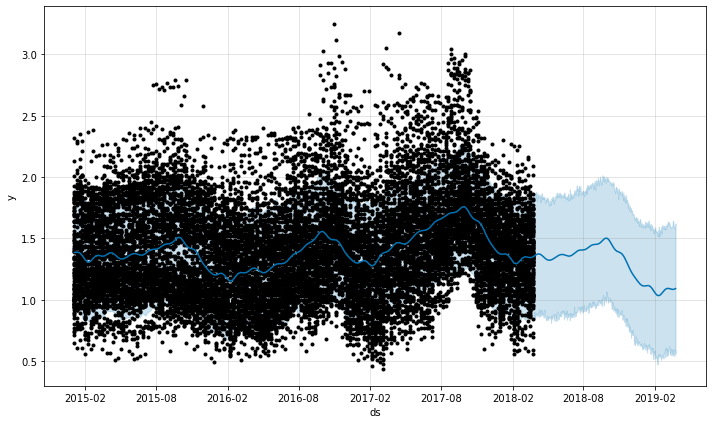

In [18]:
figure = m.plot(fcst=forecast)

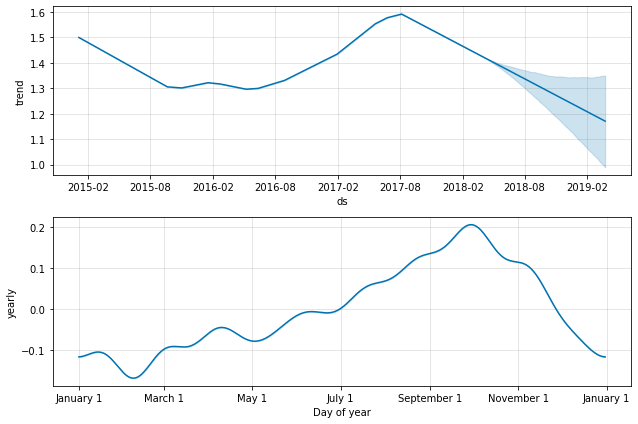

In [19]:
figure = m.plot_components(fcst=forecast)

### Part 2:

In [20]:
df = pd.read_csv(filepath_or_buffer="avocado.csv", usecols=['Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])
df = df[df["region"] == "West"]
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by=["Date"])
df = df[["Date", "AveragePrice"]]
df = df.rename(mapper={'Date':'ds', 'AveragePrice':'y'}, axis=1)
df.head()

ds     y
2755  2015-01-04  0.89
11881 2015-01-04  1.40
2754  2015-01-11  0.95
11880 2015-01-11  1.39
2753  2015-01-18  0.96

In [21]:
%%time
from fbprophet import Prophet

m = Prophet()
m.fit(df=df)

# Forcasting into the future

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 1.66 s


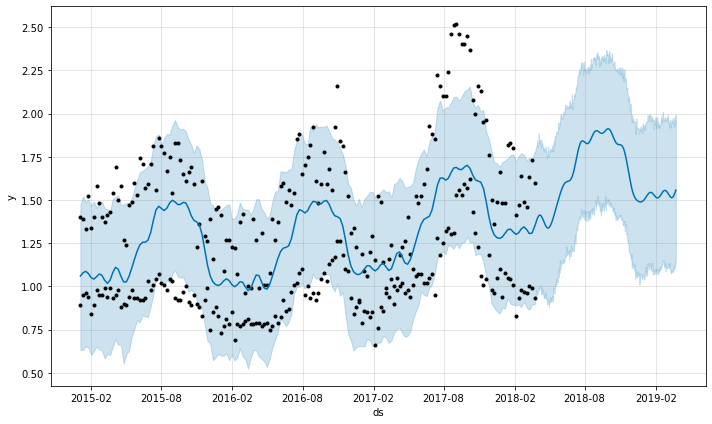

In [22]:
figure = m.plot(fcst=forecast)

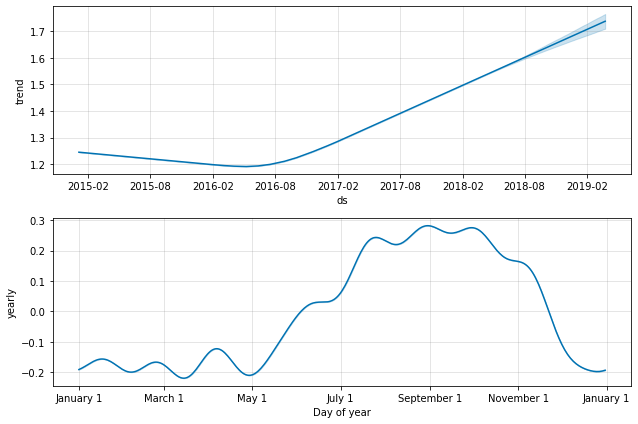

In [23]:
figure = m.plot_components(fcst=forecast)

In [24]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
plot_components_plotly(m, forecast)